In [4]:
import uproot
import numpy as np
import pandas as pd
from scipy import constants
import subprocess
import os
import matplotlib.pyplot as plt
import scipy.io as io

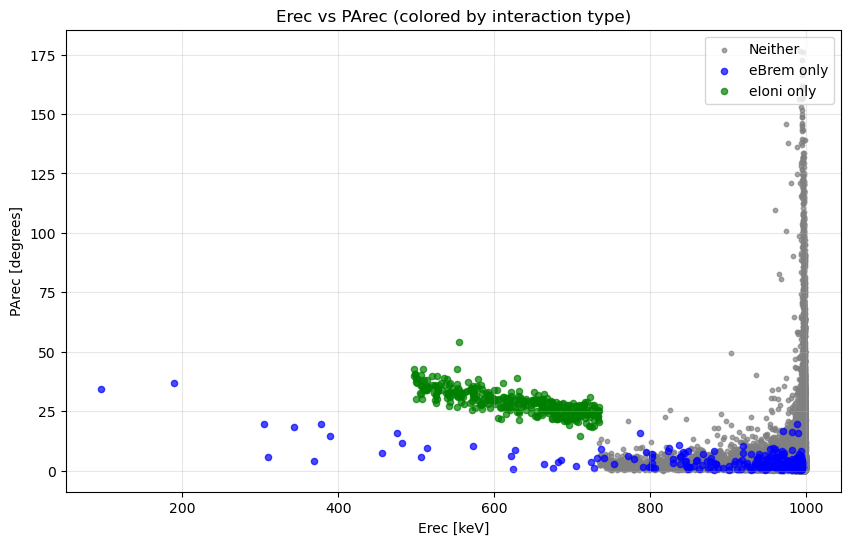

EBrem Ratio: 0.030100%
EIoni Ratio: 0.034500%
Angle greater than 90 degrees ratio: 0.016700%


In [5]:
with uproot.open("./Record_1000.0000_20.00.root") as file:
        data = file['ntuple/Ntuple1']
        result = data.arrays(['Pdir','E','HasEBrem','HasEIoni'],library='pd')
        result['PdirAngle'] = np.arccos(result['Pdir'])/np.pi*180
        Erec = result['E'].values*1e3 # [keV]
        PArec = result['PdirAngle'].values
        HasEBrem = result['HasEBrem'].values
        HasEIoni = result['HasEIoni'].values
        
        plt.figure(figsize=(10, 6))
        
        # Create conditions for different interaction types
        both = (result['HasEBrem'] == 1) & (result['HasEIoni'] == 1)
        ebrem_only = (result['HasEBrem'] == 1) & (result['HasEIoni'] == 0)
        eioni_only = (result['HasEBrem'] == 0) & (result['HasEIoni'] == 1)
        neither = (result['HasEBrem'] == 0) & (result['HasEIoni'] == 0)
        
        # Plot each category
        if neither.any():
                plt.scatter(Erec[neither], PArec[neither], c='gray', alpha=0.7, s=10, label='Neither')
        if both.any():
                plt.scatter(Erec[both], PArec[both], c='red', alpha=0.7, s=20, label='Both eBrem & eIoni')
        if ebrem_only.any():
                plt.scatter(Erec[ebrem_only], PArec[ebrem_only], c='blue', alpha=0.7, s=20, label='eBrem only')
        if eioni_only.any():
                plt.scatter(Erec[eioni_only], PArec[eioni_only], c='green', alpha=0.7, s=20, label='eIoni only')
                
        plt.xlabel('Erec [keV]')
        plt.ylabel('PArec [degrees]')
        plt.title('Erec vs PArec (colored by interaction type)')
        plt.legend(loc='upper right')  # Specify explicit location instead of "best"
        plt.grid(True, alpha=0.3)
        plt.show()
# Count occurrences where HasEBrem equals 1
hasebrem_count = np.sum(HasEBrem == 1)
hasebrem_ratio = hasebrem_count / len(HasEBrem)
print(f"EBrem Ratio: {hasebrem_ratio:.6%}")

# Count occurrences where HasEIoni equals 1
haseioni_count = np.sum(HasEIoni == 1)
haseioni_ratio = haseioni_count / len(HasEIoni)
print(f"EIoni Ratio: {haseioni_ratio:.6%}")

PA_scatter = PArec[neither]
PA_large = PA_scatter[PA_scatter >=90]
PA_large_ratio = len(PA_large) / len(PArec)
print(f"Angle greater than 90 degrees ratio: {PA_large_ratio:.6%}")


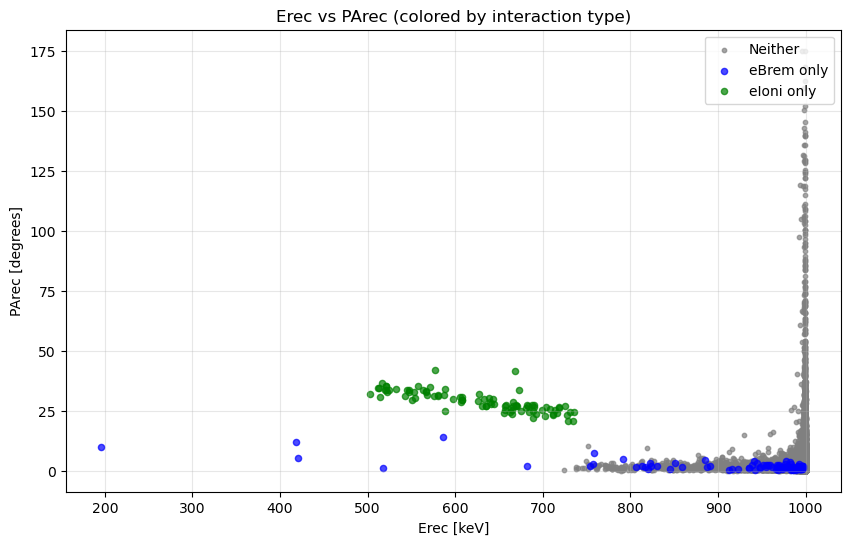

EBrem Ratio: 0.009500%
EIoni Ratio: 0.009100%
Angle greater than 90 degrees ratio: 0.006000%


In [6]:
with uproot.open("./Record_1000.0000_6.00.root") as file:
        data = file['ntuple/Ntuple1']
        result = data.arrays(['Pdir','E','HasEBrem','HasEIoni'],library='pd')
        result['PdirAngle'] = np.arccos(result['Pdir'])/np.pi*180
        Erec = result['E'].values*1e3 # [keV]
        PArec = result['PdirAngle'].values
        HasEBrem = result['HasEBrem'].values
        HasEIoni = result['HasEIoni'].values
        
        plt.figure(figsize=(10, 6))
        
        # Create conditions for different interaction types
        both = (result['HasEBrem'] == 1) & (result['HasEIoni'] == 1)
        ebrem_only = (result['HasEBrem'] == 1) & (result['HasEIoni'] == 0)
        eioni_only = (result['HasEBrem'] == 0) & (result['HasEIoni'] == 1)
        neither = (result['HasEBrem'] == 0) & (result['HasEIoni'] == 0)
        
        # Plot each category
        if neither.any():
                plt.scatter(Erec[neither], PArec[neither], c='gray', alpha=0.7, s=10, label='Neither')
        if both.any():
                plt.scatter(Erec[both], PArec[both], c='red', alpha=0.7, s=20, label='Both eBrem & eIoni')
        if ebrem_only.any():
                plt.scatter(Erec[ebrem_only], PArec[ebrem_only], c='blue', alpha=0.7, s=20, label='eBrem only')
        if eioni_only.any():
                plt.scatter(Erec[eioni_only], PArec[eioni_only], c='green', alpha=0.7, s=20, label='eIoni only')
                
        plt.xlabel('Erec [keV]')
        plt.ylabel('PArec [degrees]')
        plt.title('Erec vs PArec (colored by interaction type)')
        plt.legend(loc='upper right')  # Specify explicit location instead of "best"
        plt.grid(True, alpha=0.3)
        plt.show()
# Count occurrences where HasEBrem equals 1
hasebrem_count = np.sum(HasEBrem == 1)
hasebrem_ratio = hasebrem_count / len(HasEBrem)
print(f"EBrem Ratio: {hasebrem_ratio:.6%}")

# Count occurrences where HasEIoni equals 1
haseioni_count = np.sum(HasEIoni == 1)
haseioni_ratio = haseioni_count / len(HasEIoni)
print(f"EIoni Ratio: {haseioni_ratio:.6%}")

PA_scatter = PArec[neither]
PA_large = PA_scatter[PA_scatter >=90]
PA_large_ratio = len(PA_large) / len(PArec)
print(f"Angle greater than 90 degrees ratio: {PA_large_ratio:.6%}")
